In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [2]:
%store -r electric_res

In [3]:
electric_res.head()

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalkWh,AveragekWh,Day,Date,DateMY
0,93201,7,2021,Elec- Residential,N,314,390705,1244.0,1,2021-07-01,2021-07
1,93201,8,2021,Elec- Residential,N,313,342974,1096.0,1,2021-08-01,2021-08
2,93201,9,2021,Elec- Residential,N,315,266662,847.0,1,2021-09-01,2021-09
3,93203,7,2021,Elec- Residential,Y,5042,6399477,1269.0,1,2021-07-01,2021-07
4,93203,8,2021,Elec- Residential,Y,5048,5741307,1137.0,1,2021-08-01,2021-08


In [4]:
len(electric_res['ZipCode'].unique())

727

### Remove seasonality

In [5]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
electric_res_94062 = electric_res.loc[electric_res['ZipCode'] == 94062]
electric_res_94305 = electric_res.loc[electric_res['ZipCode'] == 94305]
electric_res_94536 = electric_res.loc[electric_res['ZipCode'] == 94536]

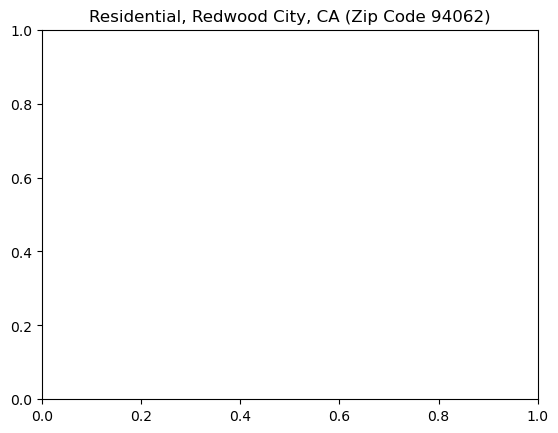

In [7]:
sns.lineplot(data=electric_res_94062, x='Date', y='AveragekWh')
plt.title('Residential, Redwood City, CA (Zip Code 94062)')

plt.show()

In [8]:
elec_test1 = pd.DataFrame()
elec_test1['AveragekWh'] = electric_res_94062['AveragekWh']
elec_test1['Date'] = electric_res_94062['Date']
elec_test1.sort_values('Date')
elec_test1.reset_index(drop=True, inplace=True) # need to drop the index for seasonal decompose to work

In [9]:
decomposition = seasonal_decompose(elec_test1['AveragekWh'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
elec_test1_resid = decomposition.resid.dropna()
elec_test1_resid.info()

<class 'pandas.core.series.Series'>
Int64Index: 124 entries, 6 to 129
Series name: resid
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
adf_test(elec_test1_resid)

Results of Dickey-Fuller Test:
Test Statistic                -7.346828e+00
p-value                        1.030367e-10
#Lags Used                     5.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64


Test statistic < critcal value and p-value < 0.05 -> series is stationary

In [ ]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [ ]:
kpss_test(elec_test1_resid)

Results of KPSS Test:
Test Statistic           0.051308
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Looks like the residual of the seasonal decomposition is stationary according to both the ADF and KPSS tests. Note: hypotheses are opposite for these two tests.

https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [ ]:
elec_test2 = pd.DataFrame()
elec_test2['AveragekWh'] = electric_res_94305['AveragekWh']
elec_test2['Date'] = electric_res_94305['Date']
elec_test2.sort_values('Date')
elec_test2.reset_index(drop=True, inplace=True) # need to drop the index for seasonal decompose to work

<Figure size 640x480 with 0 Axes>

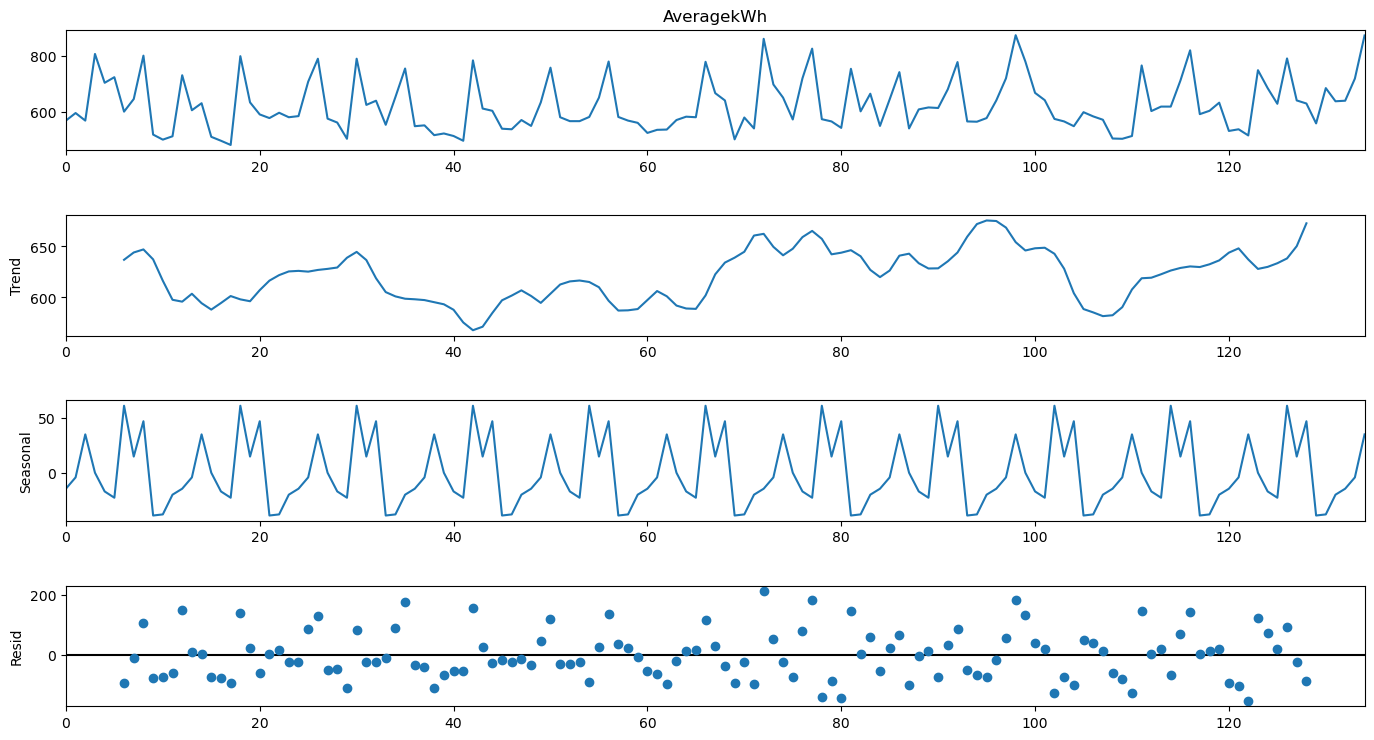

In [ ]:
decomposition2 = seasonal_decompose(elec_test2['AveragekWh'], period=12)  
fig = plt.figure()  
fig = decomposition2.plot()  
fig.set_size_inches(15, 8)

In [ ]:
elec_test2_resid = decomposition2.resid.dropna()
elec_test2_resid.info()

<class 'pandas.core.series.Series'>
Int64Index: 123 entries, 6 to 128
Series name: resid
Non-Null Count  Dtype  
--------------  -----  
123 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


<class 'pandas.core.series.Series'>
Int64Index: 124 entries, 6 to 129
Series name: resid
Non-Null Count  Dtype  
--------------  -----  
124 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


<Figure size 640x480 with 0 Axes>

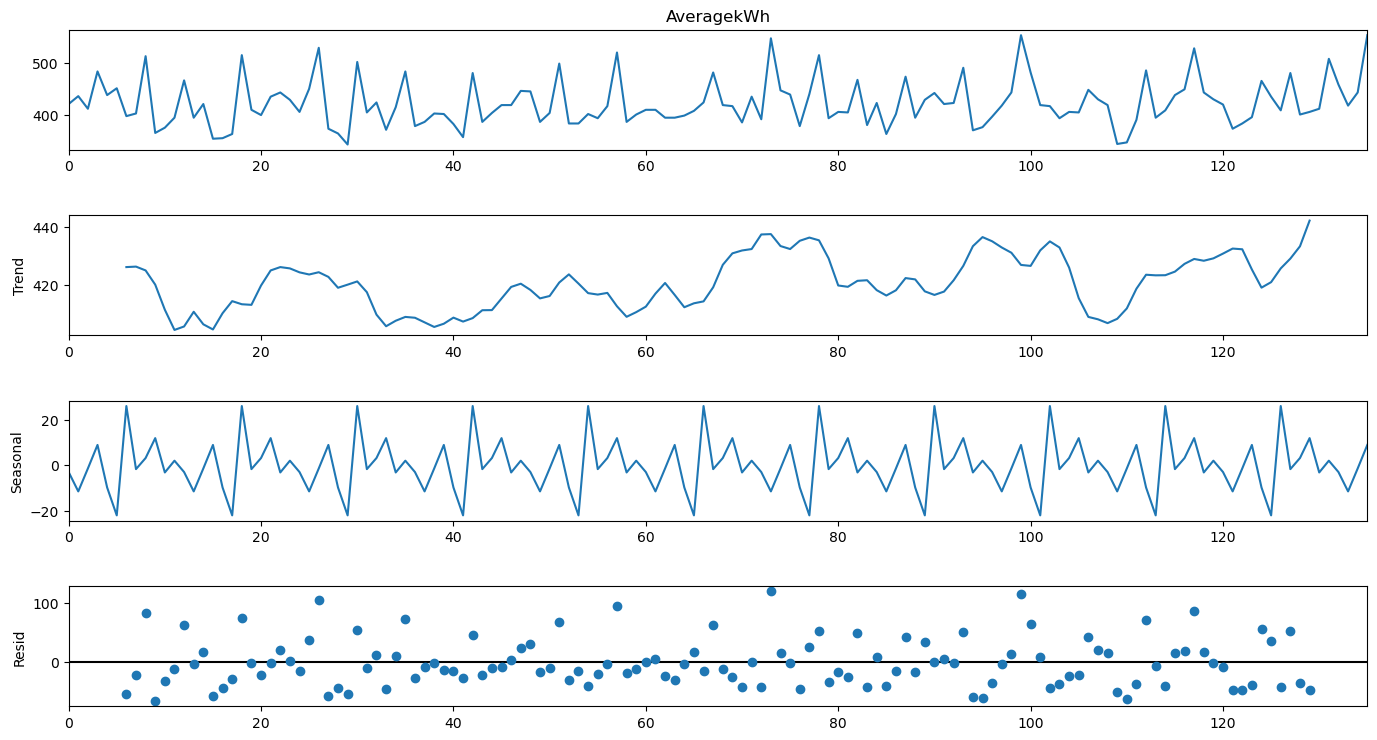

In [ ]:
elec_test3 = pd.DataFrame()
elec_test3['AveragekWh'] = electric_res_94536['AveragekWh']
elec_test3['Date'] = electric_res_94536['Date']
elec_test3.sort_values('Date')
elec_test3.reset_index(drop=True, inplace=True) # need to drop the index for seasonal decompose to work
decomposition3 = seasonal_decompose(elec_test3['AveragekWh'], period=12)  
fig = plt.figure()  
fig = decomposition3.plot()  
fig.set_size_inches(15, 8)
elec_test3_resid = decomposition3.resid.dropna()
elec_test3_resid.info()

### Autoregression

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

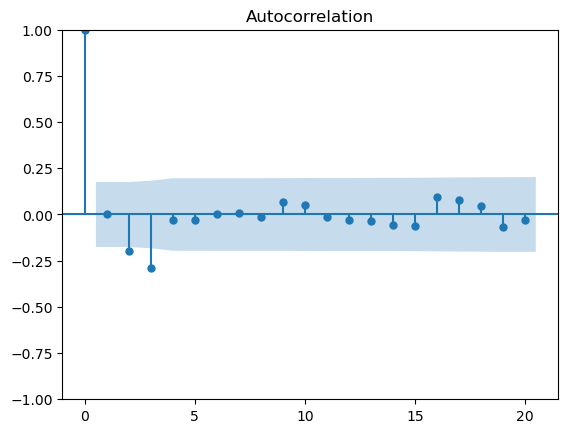

In [ ]:
plot_acf(elec_test1_resid, lags=20, alpha=0.05);

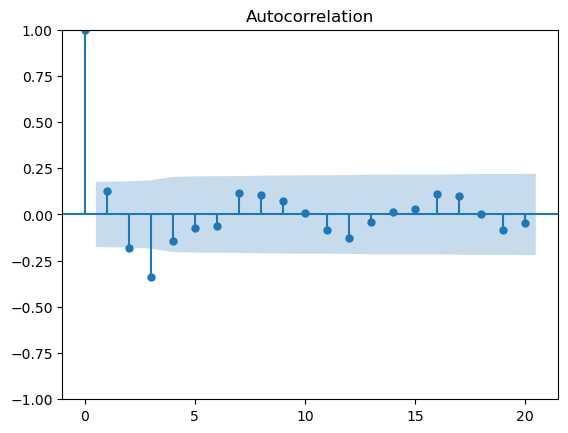

In [ ]:
plot_acf(elec_test2_resid, lags=20, alpha=0.05);

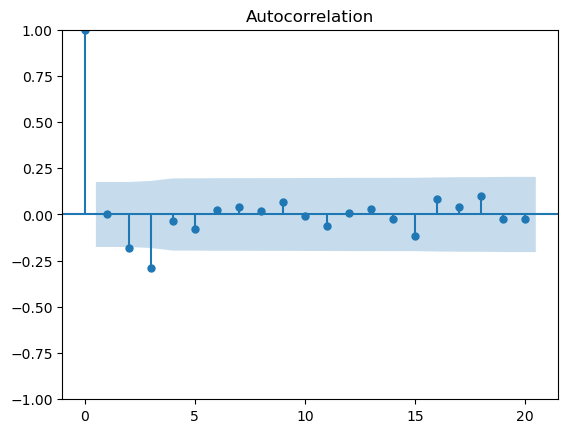

In [ ]:
plot_acf(elec_test3_resid, lags=20, alpha=0.05);

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


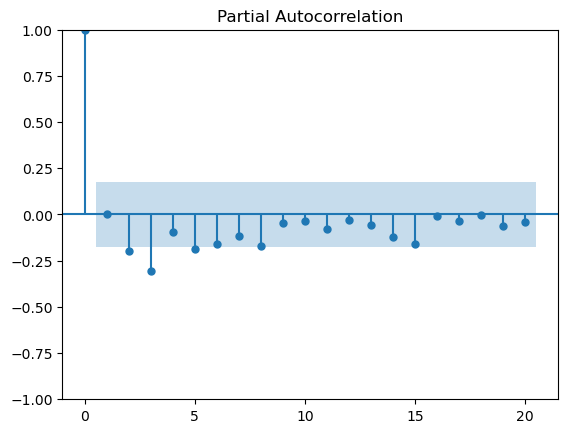

In [ ]:
plot_pacf(elec_test1_resid, lags=20, alpha=0.05);

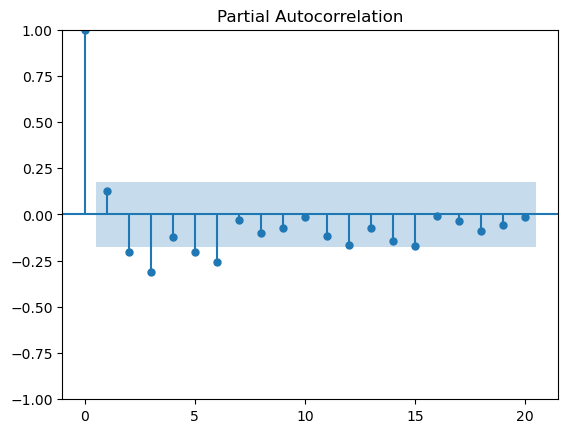

In [ ]:
plot_pacf(elec_test2_resid, lags=20, alpha=0.05);

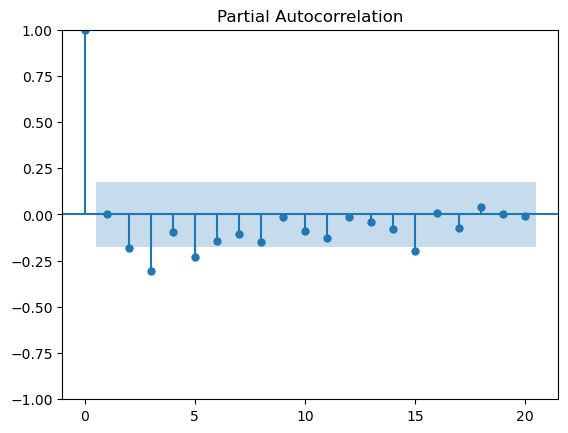

In [ ]:
plot_pacf(elec_test3_resid, lags=20, alpha=0.05);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

mod1 = ARIMA(elec_test1_resid, order=(1,0,0))

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
result1 = mod1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                  124
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -706.665
Date:                Wed, 06 Sep 2023   AIC                           1419.330
Time:                        14:00:45   BIC                           1427.791
Sample:                             0   HQIC                          1422.767
                                - 124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4551      8.742     -0.166      0.868     -18.589      15.679
ar.L1          0.0041      0.094      0.044      0.965      -0.179       0.188
sigma2      5218.4906    871.464      5.988      0.000    3510.452    6926.529
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.37
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.97
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
result1.params

const       -1.455124
ar.L1        0.004137
sigma2    5218.490624
dtype: float64

In [ ]:
mod2 = ARIMA(elec_test2_resid, order=(1,0,0))
result2 = mod2.fit()
result2.summary()
result2.params

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const       -1.456208
ar.L1        0.126317
sigma2    6593.952888
dtype: float64

### Vector Autoregression (VAR)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
model = VAR(elec_test1_resid)

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Only gave one variable to VAR

In [ ]:
elec_test1.head()

,AveragekWh,Date
0,748.0,2021-07-01
1,772.0,2021-08-01
2,730.0,2021-09-01
3,933.0,2023-01-01
4,802.0,2023-02-01


In [ ]:
elec_test1.set_index('Date', inplace=True)

In [ ]:
elec_test1.sort_values('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

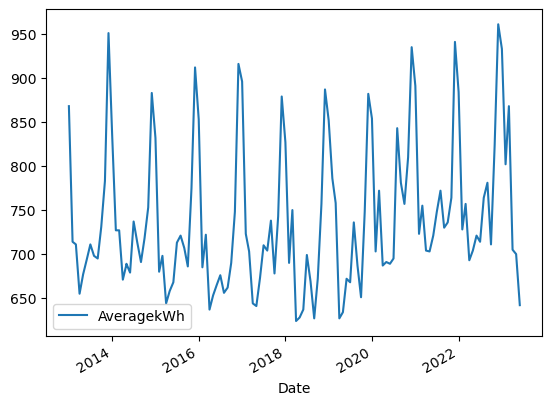

In [ ]:
elec_test1.plot()

In [ ]:
electric_res_94062 = electric_res.loc[electric_res['ZipCode'] == 94062].set_index('Date').sort_values('Date')[['AveragekWh']]
electric_res_94303 = electric_res.loc[electric_res['ZipCode'] == 94303].set_index('Date').sort_values('Date')[['AveragekWh']]
electric_res_94536 = electric_res.loc[electric_res['ZipCode'] == 94536].set_index('Date').sort_values('Date')[['AveragekWh']]

In [ ]:
electric_res_94062.shape

(136, 10)

In [ ]:
electric_res_94303.shape

(136, 10)

In [ ]:
electric_res_94536.shape

(136, 10)

In [ ]:
elec_merged = electric_res_94062.merge(electric_res_94303, how='inner', on='Date', suffixes).merge(electric_res_94536, how='inner', on='Date')

In [ ]:
elec_merged.head()

,AveragekWh_x,AveragekWh_y
Date,,
2013-01-01,868.0,635.0
2013-02-01,714.0,493.0
2013-03-01,711.0,458.0
2013-04-01,655.0,410.0
2013-05-01,677.0,411.0


In [ ]:
elec_joined = electric_res_94062.join(electric_res_94303, on='Date', lsuffix='_94062', rsuffix='_94303')

In [ ]:
elec_joined2 = elec_joined.join(electric_res_94536, on='Date', rsuffix='94536')

In [ ]:
elec_joined2.columns = ['AveragekWh_94062', 'AveragekWh_94303', 'AveragekWh_94536']

In [ ]:
elec_joined2.head()

,AveragekWh_94062,AveragekWh_94303,AveragekWh_94536
Date,,,
2013-01-01,868.0,635.0,546.0
2013-02-01,714.0,493.0,447.0
2013-03-01,711.0,458.0,439.0
2013-04-01,655.0,410.0,399.0
2013-05-01,677.0,411.0,408.0


<AxesSubplot:xlabel='Date'>

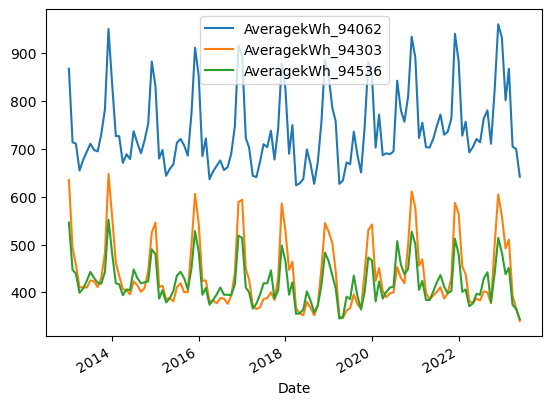

In [ ]:
elec_joined2.plot()

Grainger causality test
https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(elec_joined2, variables = elec_joined2.columns)        

,AveragekWh_94062_x,AveragekWh_94303_x,AveragekWh_94536_x
AveragekWh_94062_y,1.0000,0.0,0.0
AveragekWh_94303_y,0.0008,1.0,0.0
AveragekWh_94536_y,0.0000,0.0,1.0


Cointegration test

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(elec_joined2)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
AveragekWh_94062 ::  15.64     > 24.2761   =>   False
AveragekWh_94303 ::  3.91      > 12.3212   =>   False
AveragekWh_94536 ::  0.1       > 4.1296    =>   False


# SARIMAX model ###

In [10]:
%store -r data_rwc

In [11]:
data_rwc.head()

,AveragekWh,HDD,CDD,HDD_sc,CDD_sc
DATE,,,,,
2013-01-01,542.0,512.73,0.0,1.868594,-0.782745
2013-02-01,440.0,413.43,0.0,1.289173,-0.782745
2013-03-01,431.0,266.01,0.0,0.428970,-0.782745
2013-04-01,391.0,137.28,21.9,-0.322176,-0.432669
2013-05-01,395.0,107.25,39.6,-0.497403,-0.149730


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
y = data_rwc['AveragekWh']

exog = data_rwc[['HDD_sc', 'CDD_sc']]

In [6]:
# create a SARIMA model
model = SARIMAX(y, order=(1,0,0), seasonal_order=(1,1,0,12))

# fit the model
results = model.fit()

print(results.summary())

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12518D+00    |proj g|=  3.68849D-02

At iterate    5    f=  4.11992D+00    |proj g|=  2.85912D-02

At iterate   10    f=  4.11440D+00    |proj g|=  9.11632D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.119D-07   4.114D+00
  F =   4.1144038393543996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

 This problem is unconstrained.


In [34]:
# create a SARIMAX model
modelx = SARIMAX(y, exog=exog, order=(1,0,0), seasonal_order=(1,1,0,12))

# fit the model
resultsx = modelx.fit()

print(resultsx.summary())

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40936D+00    |proj g|=  1.54017D-01

At iterate    5    f=  3.39076D+00    |proj g|=  6.59681D-03

At iterate   10    f=  3.38926D+00    |proj g|=  2.25905D-03

At iterate   15    f=  3.38909D+00    |proj g|=  5.94478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.251D-06   3.389D+00
  F =   3.3890873164571484     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

## Model optimization

We need to find the best model parameters:

Non-seasonal:

p - autoregressive order  
d - differencing order  
q - moving average order  

Seasonal:

P - autoregressive order  
D - differencing order  
Q - moving average order  
S - number of time steps per seasonal cycle

We can lock in some parameters from the start:

S=12 due to monthly sampling period
D=1 should be used when the seasonal pattern is strong
d= 0 or 1

We'll use the Box-Jenkins method for building out our model parameters.

First, we'll use the Augmented Dickey-Fuller test to identify the best differencing parameters. The goal for this test will be to identify a differencing transformation that results in the test statistic less than the critical value, and the p-value < 0.05, which suggests that the time series has been made stationary.


In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [20]:
# Test on the raw time series (d=0, D=0)
adf_test(y)

Results of Dickey-Fuller Test:
Test Statistic                  -2.092584
p-value                          0.247507
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


ADF test failed for d=0, D=0

In [25]:
# Test on the seasonaly differenced time series (d=0, D=1)
y_ds = y.diff(12).dropna()
adf_test(y_ds)

Results of Dickey-Fuller Test:
Test Statistic                  -2.597119
p-value                          0.093594
#Lags Used                      13.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


ADF test is better but still failed for d=0, D=1

In [26]:
# Add one order of non-seasonal differencing (d=1, D=1)
y_d_ds = y.diff().diff(12).dropna()
adf_test(y_d_ds)

Results of Dickey-Fuller Test:
Test Statistic                  -5.192644
p-value                          0.000009
#Lags Used                      12.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


ADF test passed, so d=1 and D=1 should be used.

Next, to find p, q, P, Q we should look at the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the stationary (differenced) time series.

The ACF indicates the likely q order.  
The PACF indicates the likely p order.

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


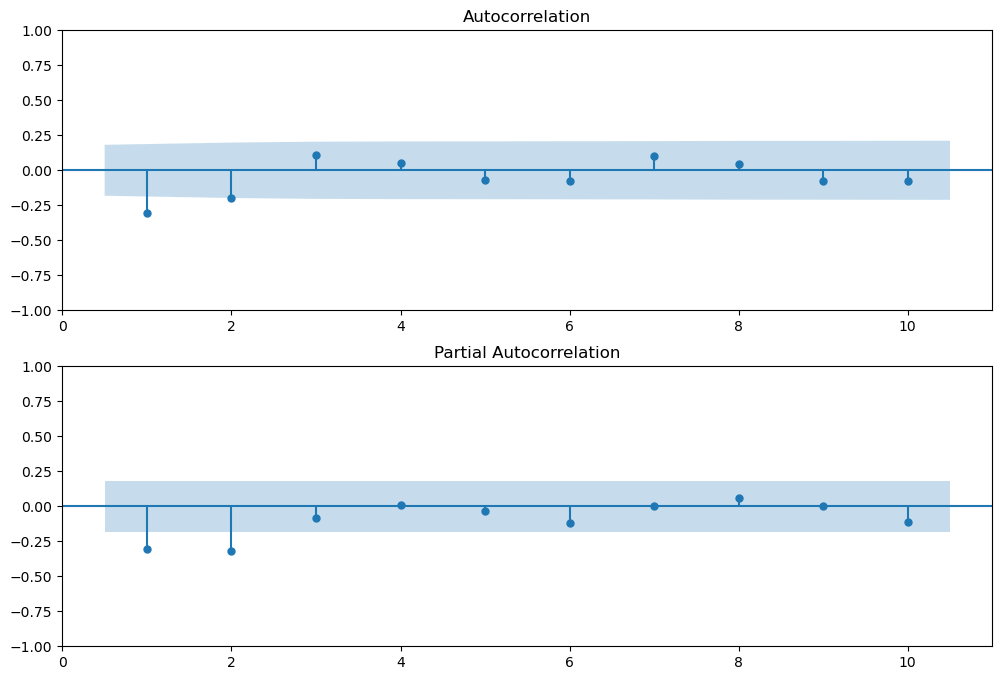

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
# Plot the ACF of df
plot_acf(y_d_ds, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(y_d_ds, lags=10, zero=False, ax=ax2)


plt.show()

P=2, Q=0

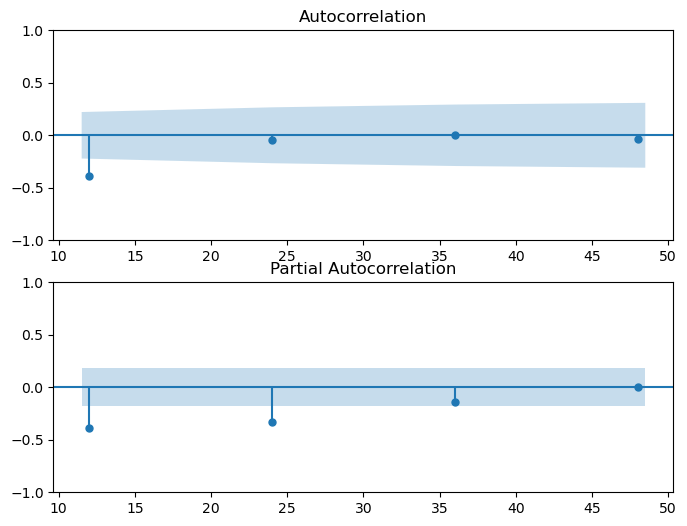

In [29]:
# Make list of lags
lags = [12, 24, 36, 48]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(y_d_ds, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(y_d_ds, lags=lags, zero=False, ax=ax2)

plt.show()

P=0, Q=1

In [36]:
import pmdarima as pm

results = pm.auto_arima(y,
                        d=1, D=1,
                        seasonal=True, m=12,
                        start_p=0,
                        start_q=0,
                        start_P=0,
                        start_Q=0,
                        max_p=2,
                        max_q=2,
                        max_P=2,
                        max_Q=2,
                        trace=True,
                        information_criterion='aic',
                        error_action='ignore'
                        )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1107.560, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1070.736, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1041.303, Time=0.17 sec


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1085.682, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1042.253, Time=0.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1042.089, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1058.810, Time=0.08 sec


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1043.131, Time=0.61 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1066.679, Time=0.07 sec


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1041.665, Time=0.22 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1041.435, Time=0.15 sec


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1054.154, Time=0.18 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1041.876, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1043.084, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 2.991 seconds


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


In [33]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  129
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -517.651
Date:                            Fri, 02 Feb 2024   AIC                           1041.303
Time:                                    16:52:43   BIC                           1049.564
Sample:                                01-01-2013   HQIC                          1044.656
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6023      0.090     -6.725      0.000      -0.778      -0.427
ma.S.L12      -0.7820      0.098   